# Лабораторная работа № 5. ТМО.

# Ансамбли моделей машинного обучения.

## Цель лабораторной работы: 
изучение ансамблей моделей машинного обучения.

## Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие ансамблевые модели:

- одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
- одну из моделей группы бустинга;
- одну из моделей группы стекинга.

5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:

- Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
- Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.

6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

### Импорт библиотек

In [1]:
import sys
sys.path
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from io import StringIO
from sklearn.model_selection import train_test_split

## Загрузка данных

### Описание набора данных:

##### содержание
Землетрясения вызываются движениями внутри земной коры и верхней мантии. Они варьируются от событий, слишком слабых, чтобы их можно было обнаружить иначе, как с помощью чувствительных приборов, до внезапных и насильственных событий продолжительностью в несколько минут, которые привели к некоторым из величайших катастроф в истории человечества. Ниже землетрясения перечислены по периоду, региону или стране, году, магнитуде, стоимости, числу погибших и количеству научных исследований.

##### контекст
Модифицированная шкала интенсивности Меркалли (MM, MMI или MCS), разработанная на основе шкалы интенсивности Меркалли Джузеппе Меркалли 1902 года, представляет собой шкалу сейсмической интенсивности, используемую для измерения интенсивности сотрясений, вызванных землетрясением. Он измеряет последствия землетрясения в данном месте, отличающиеся от присущей землетрясению силы, измеряемой по шкалам сейсмической магнитуды (например, магнитуда "МВт", обычно указываемая для землетрясения). В то время как сотрясение вызвано сейсмической энергией, высвобождаемой землетрясением, землетрясения отличаются тем, какая часть их энергии излучается в виде сейсмических волн. Более глубокие землетрясения также меньше взаимодействуют с поверхностью, и их энергия распределяется по большему объему. Интенсивность сотрясений локализована, обычно уменьшается с удалением от эпицентра землетрясения, но может усиливаться в осадочных бассейнах и некоторых видах неуплотненных грунтов.

Описание столбцов:
- Year - год
- Magnitude - магнитуда
- Location - место
- Depth (km) - глубина в км.
- MMI - Модифицированная шкала интенсивности Меркалли
- Notes - заметка
- Deaths - смерти
- Injuries - Количество травм
- Event - событие
- Date - дата

#### Загрузим данные:

In [2]:
df = pd.read_csv('Largest earthquakes by year.csv')

### Основные характеристики датасета

In [3]:
# Выведем первые 5 строк из выбранного датасета.
df.head()

,Unnamed: 0,Year,Magnitude,Location,Depth (km),MMI,Notes,Deaths,Injuries,Event,Date
0,0,1937,7.8,"Republic of China, Qinghai",15.0,VIII,-,0,0,[8],January 7
1,1,1938,8.5–8.6,"Dutch East Indies, Maluku offshore",60.0,VII,A damaging tsunami up to 1.5 meters high was r...,0,0,1938 Banda Sea earthquake,February 1
2,2,1939,8.1,"Dutch East Indies, Central Sulawesi offshore",150.0,VII,-,0,0,[9],December 21
3,3,1940,8.2,"Peru, Lima",45.0,VIII,A tsunami up to 2 meters high was generated wi...,179–300,3500,1940 Lima earthquake,May 24
4,4,1941,8.0,"Japan, Miyazaki offshore",35.0,VII,A tsunami up to 1.2 meters high was observed i...,2,0,1941 Hyūga-nada earthquake,November 18


In [4]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 91
Всего колонок: 11


In [5]:
# Выведем список колонок с типами данных.
df.dtypes

Unnamed: 0      int64
Year            int64
Magnitude      object
Location       object
Depth (km)    float64
MMI            object
Notes          object
Deaths         object
Injuries       object
Event          object
Date           object
dtype: object

### Проверка на пустые значения в датасете

In [6]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

Unnamed: 0 - 0
Year - 0
Magnitude - 0
Location - 0
Depth (km) - 0
MMI - 0
Notes - 1
Deaths - 0
Injuries - 0
Event - 0
Date - 0


В колонке Notes есть один пропуск. Его надо заполнить.

In [7]:
percent = (1 / 91) * 100
print('Процент пропусков в Notes: {}'.format(percent))

Процент пропусков в Notes: 1.098901098901099


##### ---- Настройка формата графиков ----

In [8]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4
pd.set_option("display.width", 70)

##### ----------------------------------------------------------

### Обработка пропусков данных

##### Очистка строк

In [9]:
# Удаление строк, содержащих пустые значения
df_no_null = df.dropna(axis=0, how='any')
(df.shape, df_no_null.shape)

((91, 11), (90, 11))

In [10]:
df_no_null.head(11)

,Unnamed: 0,Year,Magnitude,Location,Depth (km),MMI,Notes,Deaths,Injuries,Event,Date
0,0,1937,7.8,"Republic of China, Qinghai",15.0,VIII,-,0,0,[8],January 7
1,1,1938,8.5–8.6,"Dutch East Indies, Maluku offshore",60.0,VII,A damaging tsunami up to 1.5 meters high was r...,0,0,1938 Banda Sea earthquake,February 1
2,2,1939,8.1,"Dutch East Indies, Central Sulawesi offshore",150.0,VII,-,0,0,[9],December 21
3,3,1940,8.2,"Peru, Lima",45.0,VIII,A tsunami up to 2 meters high was generated wi...,179–300,3500,1940 Lima earthquake,May 24
4,4,1941,8.0,"Japan, Miyazaki offshore",35.0,VII,A tsunami up to 1.2 meters high was observed i...,2,0,1941 Hyūga-nada earthquake,November 18
5,5,1942,8.2,"Peru, Ica",35.0,IX,"In Callao, the amplitude of the tsunami's osci...",30,25,1942 Peru earthquake,August 24
6,6,1943,7.9–8.2,"Chile, Coquimbo",35.0,VIII,A minor tsunami caused local damage along the ...,11,0,1943 Ovalle earthquake,April 6
7,7,1944,8.0,"Japan, Wakayama offshore",30.0,VIII,A destructive tsunami which had a height of 10...,1223,2135,1944 Tonankai earthquake,December 7
8,8,1945,8.1,"India, Balochistan offshore",15.0,X,A destructive 15-metre high tsunami was observ...,4000,0,1945 Balochistan earthquake,November 27
9,9,1946,8.6,"United States, Alaska offshore",15.0,VI,Most of the casualties and damage occurred in ...,173,0,1946 Aleutian Islands earthquake,April 1


In [11]:
total_count = df_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 90


### Кодирование категориальных признаков

Преобразуем в числовые значения (label encoding)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
le = LabelEncoder()
    # "Magnitude"
le.fit(df_no_null.Magnitude.drop_duplicates()) 
df_no_null.Magnitude = le.transform(df_no_null.Magnitude)
    # "Location"
le.fit(df_no_null["Location"].drop_duplicates()) 
df_no_null["Location"] = le.transform(df_no_null["Location"])
    # "MMI"
le.fit(df_no_null.MMI.drop_duplicates()) 
df_no_null.MMI = le.transform(df_no_null.MMI)
    # "Notes"
le.fit(df_no_null.Notes.drop_duplicates()) 
df_no_null.Notes = le.transform(df_no_null.Notes)
    # "Magnitude"
le.fit(df_no_null.Magnitude.drop_duplicates()) 
df_no_null.Magnitude = le.transform(df_no_null.Magnitude)
    # "Deaths"
le.fit(df_no_null.Deaths.drop_duplicates()) 
df_no_null.Deaths = le.transform(df_no_null.Deaths)
    # "Injuries"
le.fit(df_no_null.Injuries.drop_duplicates()) 
df_no_null.Injuries = le.transform(df_no_null.Injuries)
    # "Event"
le.fit(df_no_null.Event.drop_duplicates()) 
df_no_null.Event = le.transform(df_no_null.Event)
    # "Date"
le.fit(df_no_null.Date.drop_duplicates()) 
df_no_null.Date = le.transform(df_no_null.Date)

C:\Users\79626\AppData\Local\Temp\ipykernel_8244\3034348005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null.Magnitude = le.transform(df_no_null.Magnitude)
C:\Users\79626\AppData\Local\Temp\ipykernel_8244\3034348005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null["Location"] = le.transform(df_no_null["Location"])
C:\Users\79626\AppData\Local\Temp\ipykernel_8244\3034348005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

<AxesSubplot:>

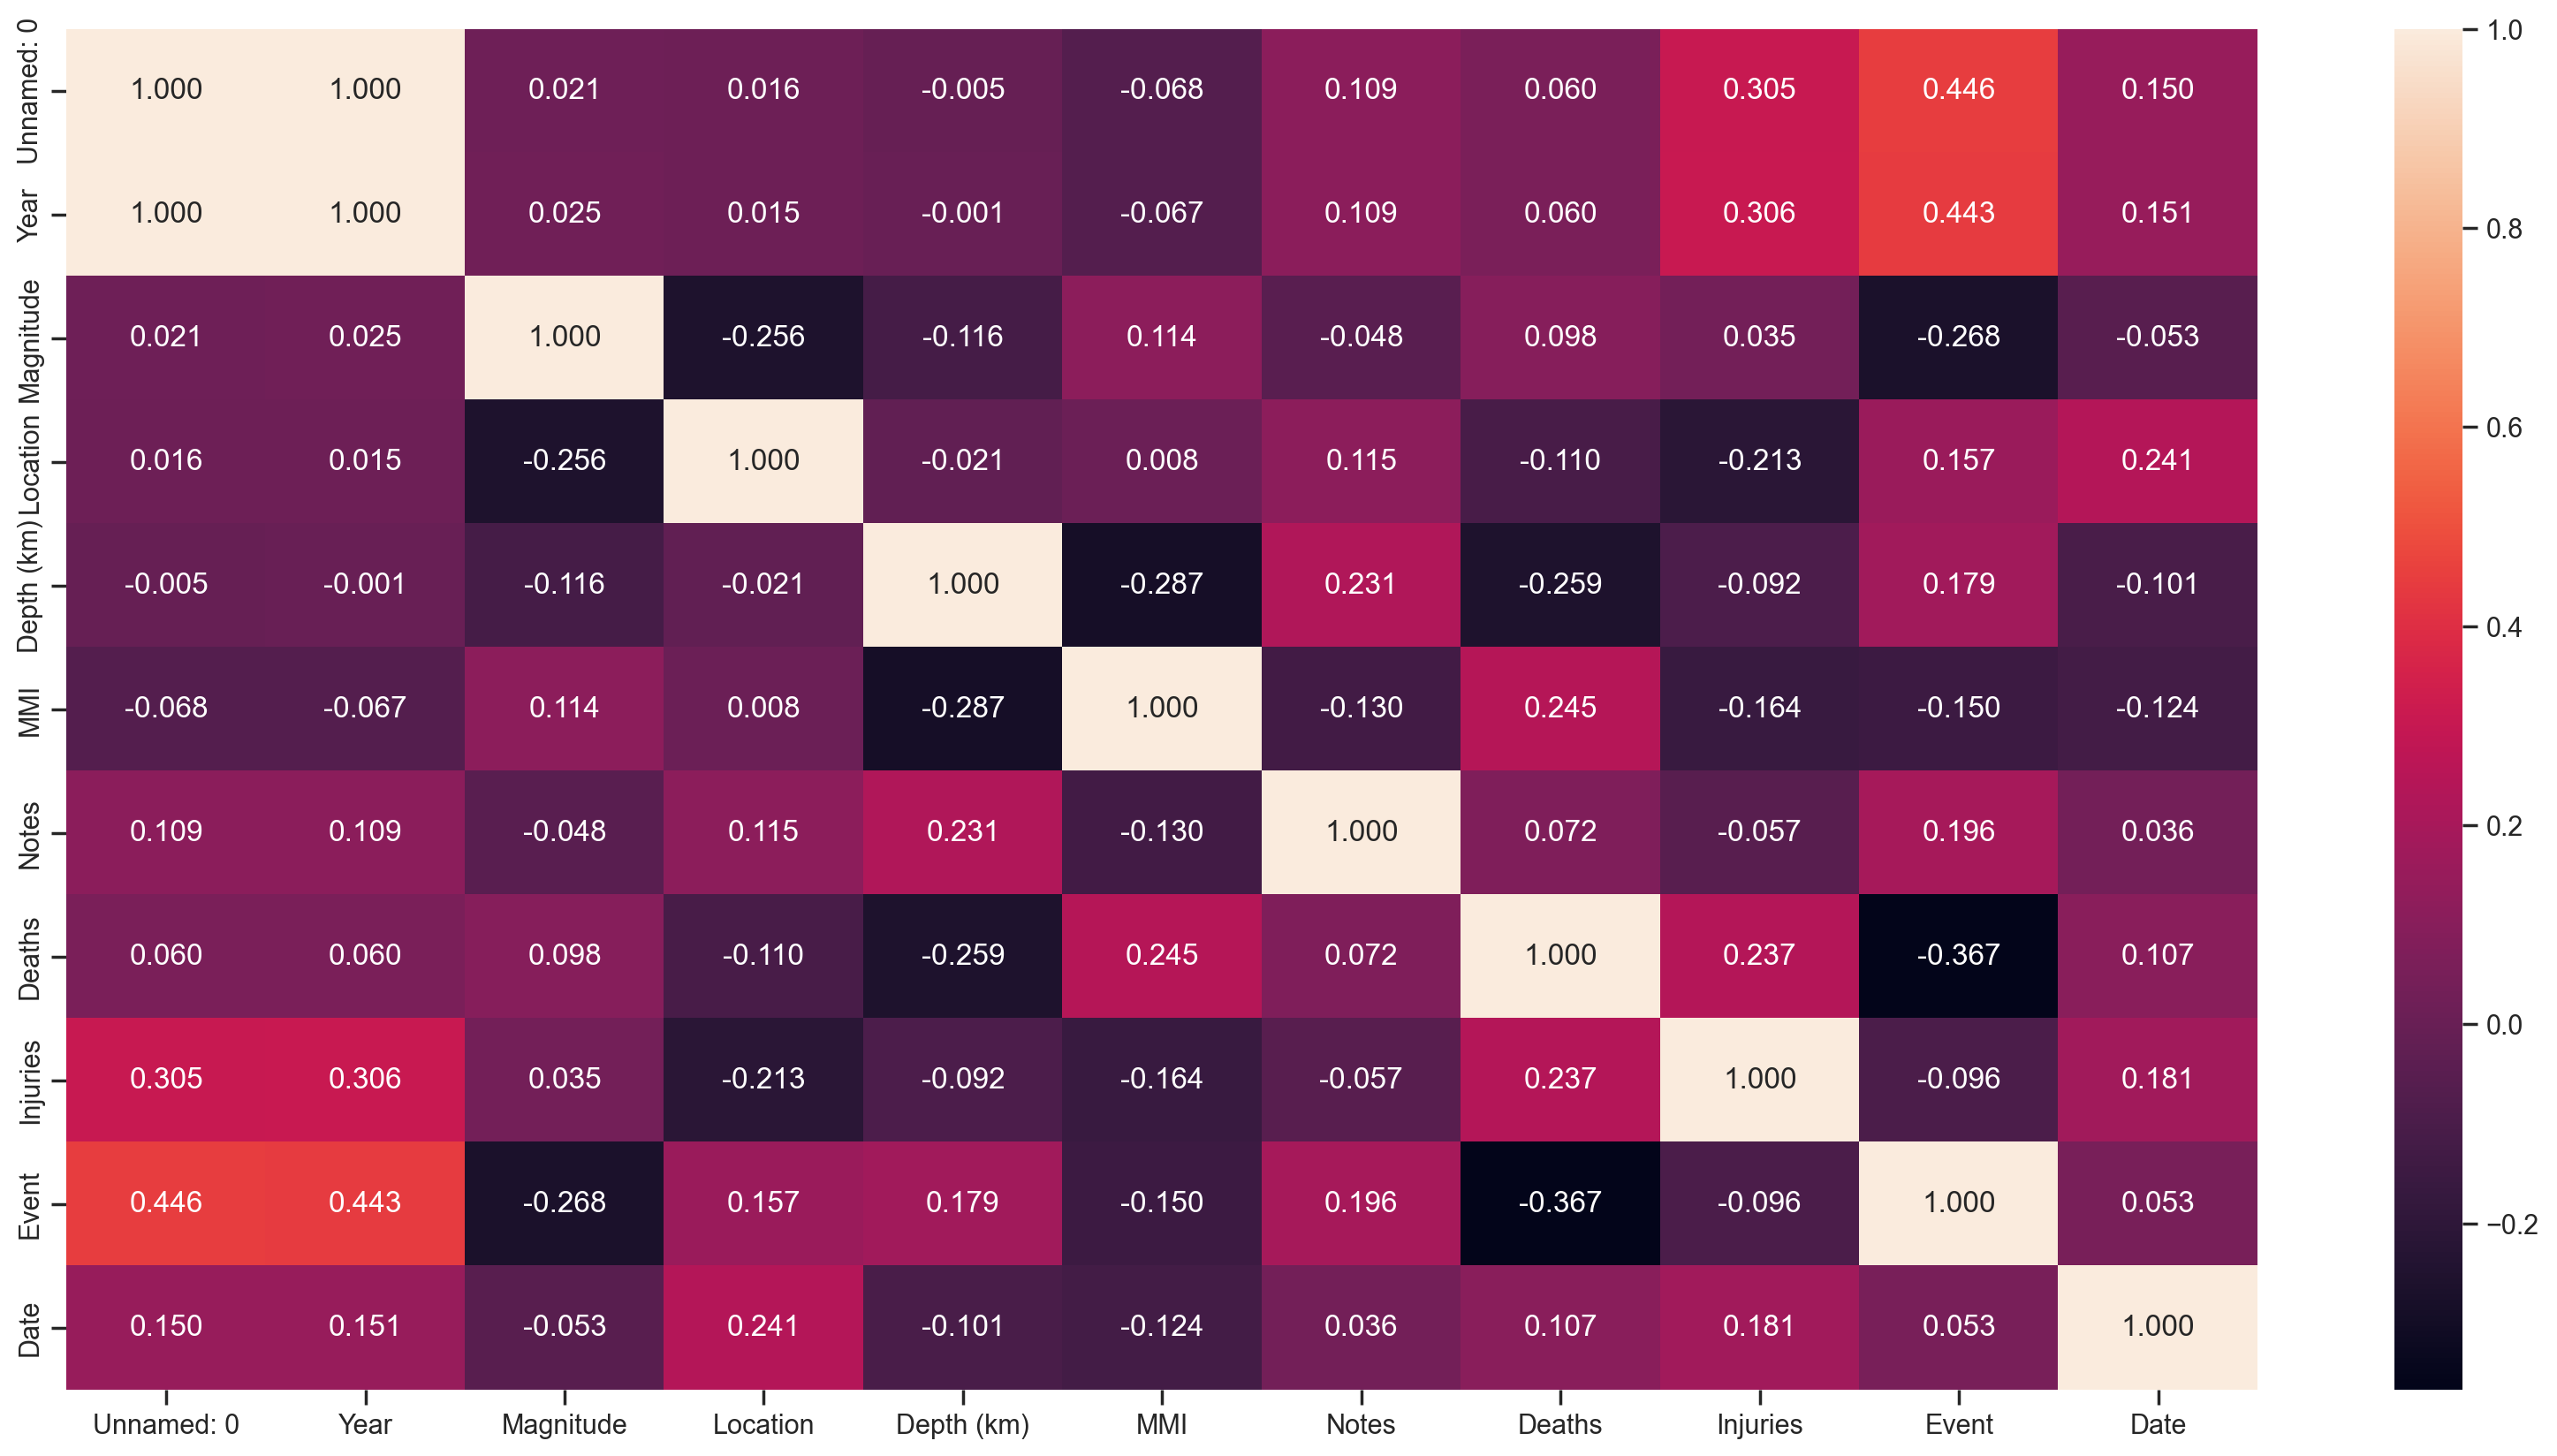

In [14]:
ig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_no_null.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

### Предсказание целевого признака

Предскажем значение целевого признака Year по MMI и Deaths, поскольку их значения кореляции ближе всего к 1

### Разбиение выборки на обучающую и тестовую

In [15]:
X = df_no_null[["MMI", "Deaths"]]
Y = df_no_null["Year"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    MMI  Deaths
0    7       0
1    6       0
2    6       0
3    7      15
4    6      19 

Выходные данные:

 0    1937
1    1938
2    1939
3    1940
4    1941
Name: Year, dtype: int64


Разделим выборку на обучающую и тестовую

In [16]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2023, test_size = 0.1)

Входные параметры обучающей выборки

In [17]:
X_train.head()

,MMI,Deaths
46,5,0
37,7,0
74,10,44
21,7,19
2,6,0


Входные параметры тестовой выборки

In [18]:
X_test.head()

,MMI,Deaths
12,9,32
77,2,17
52,6,0
0,7,0
18,1,0


Выходные параметры обучающей выборки

In [19]:
Y_train.head()

46    1980
37    1973
74    2008
21    1957
2     1939
Name: Year, dtype: int64

Выходные параметры тестовой выборки

In [20]:
Y_test.head()

12    1948
77    2011
52    1986
0     1937
18    1954
Name: Year, dtype: int64

In [21]:
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.metrics import mean_absolute_error

### Построение модели сверхслучайных деревьев (группа бэггинга)

In [22]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Обучим регрессор на 3 деревьях

In [23]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [24]:
tree1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=2022)
tree1.fit(X, Y)

C:\Users\79626\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=2022)

Out-of-bag error, возвращаемый регрессором

In [25]:
tree1.oob_score_, 1-tree1.oob_score_

(-618.0456773096815, 619.0456773096815)

In [26]:
tree1.oob_prediction_[55:70]

array([1985.5       , 1966.        , 1978.        , 1982.5       ,
       1975.5       ,    0.        , 2001.        , 1968.25      ,
       1993.91666667, 1975.5       , 1960.5       ,    0.        ,
       1998.        , 1982.5       , 1947.        ])

Выведем полученные деревья

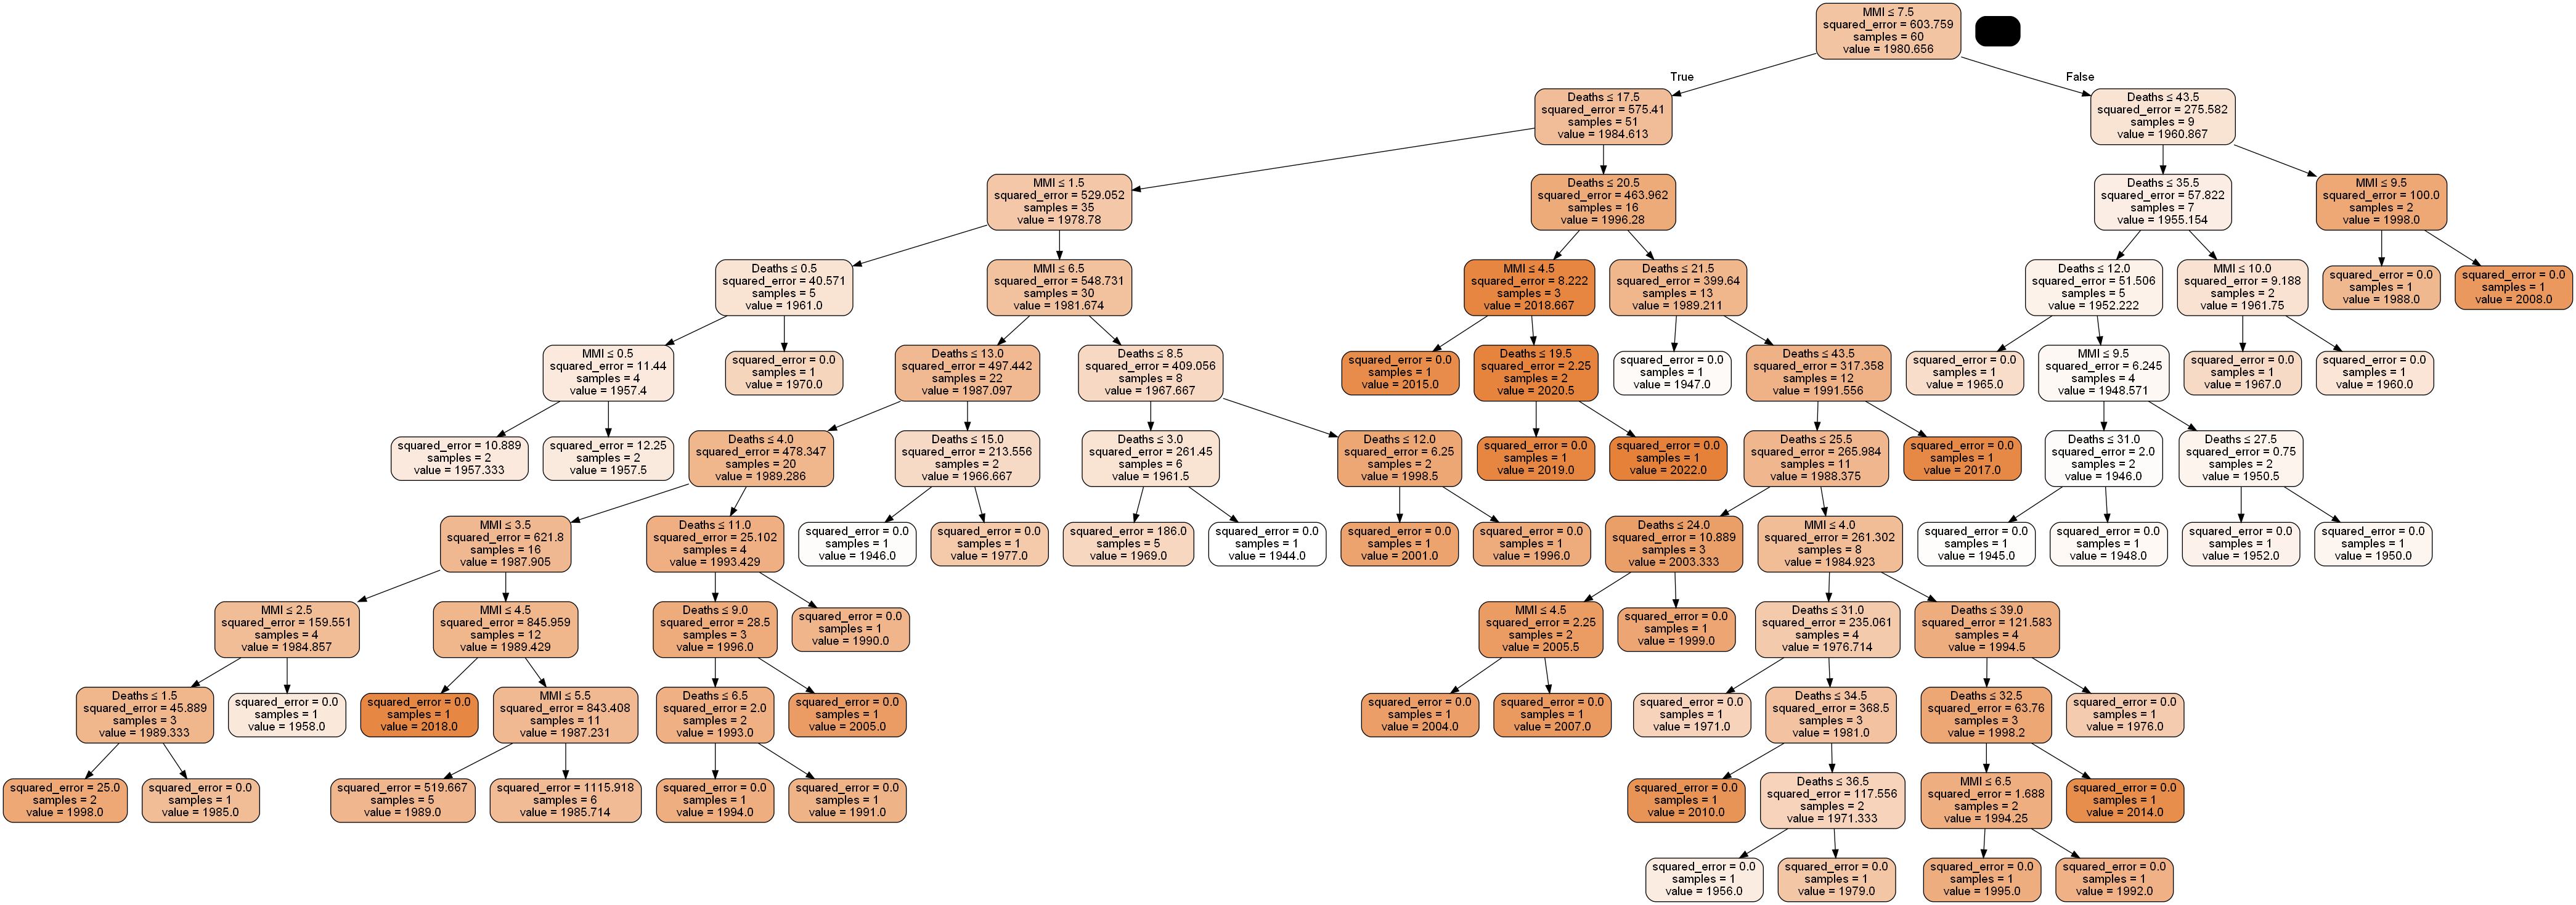

In [27]:
Image(get_png_tree(tree1.estimators_[0], X.columns[:3]), width="100%")

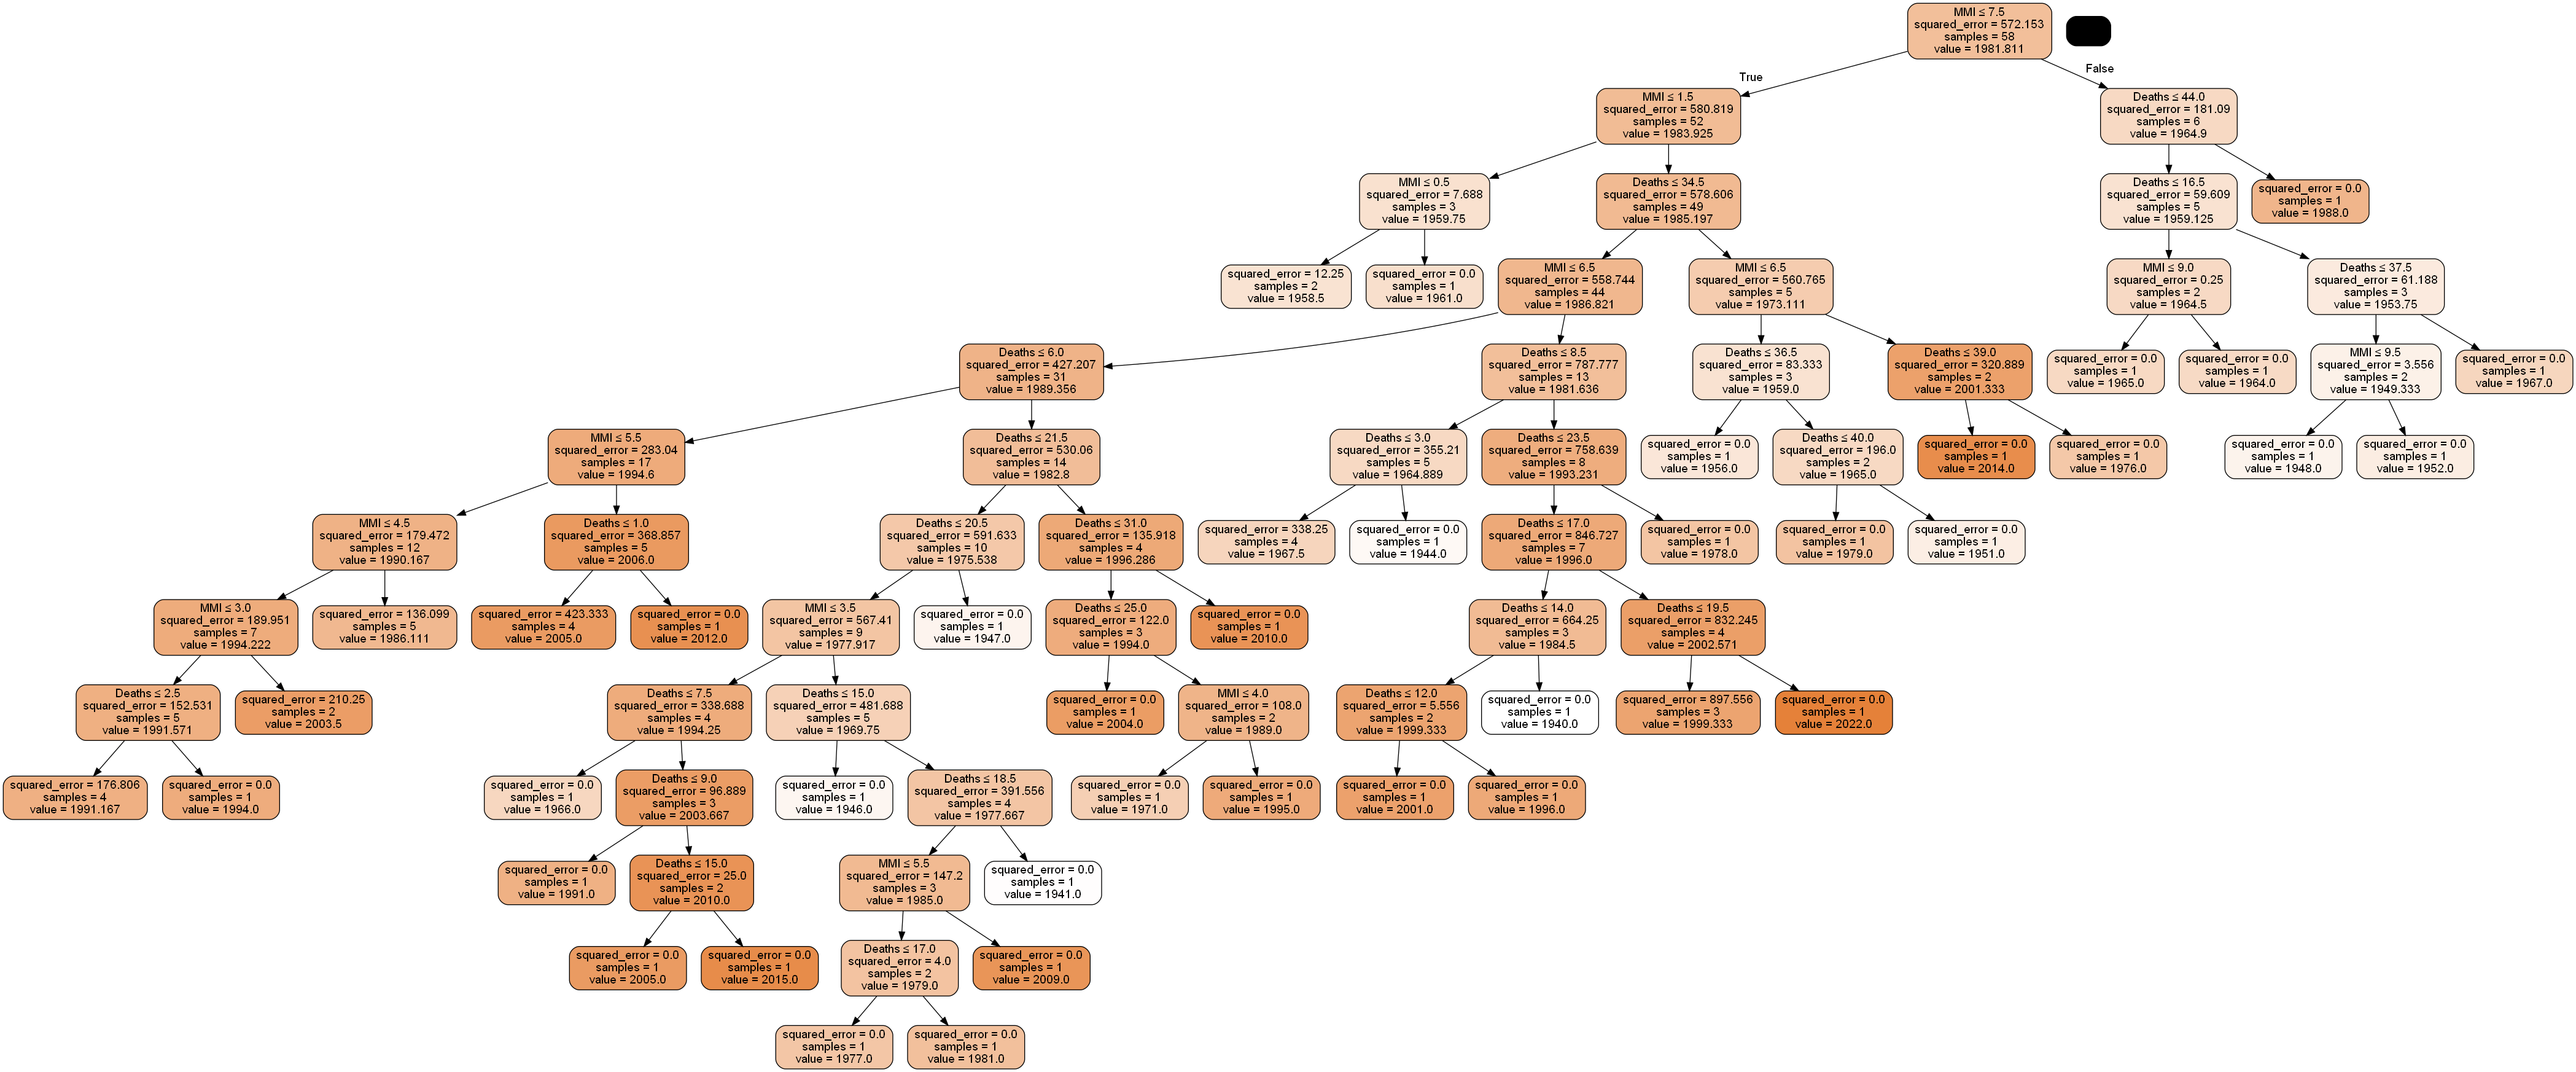

In [28]:
Image(get_png_tree(tree1.estimators_[1], X.columns[:3]), width="100%")

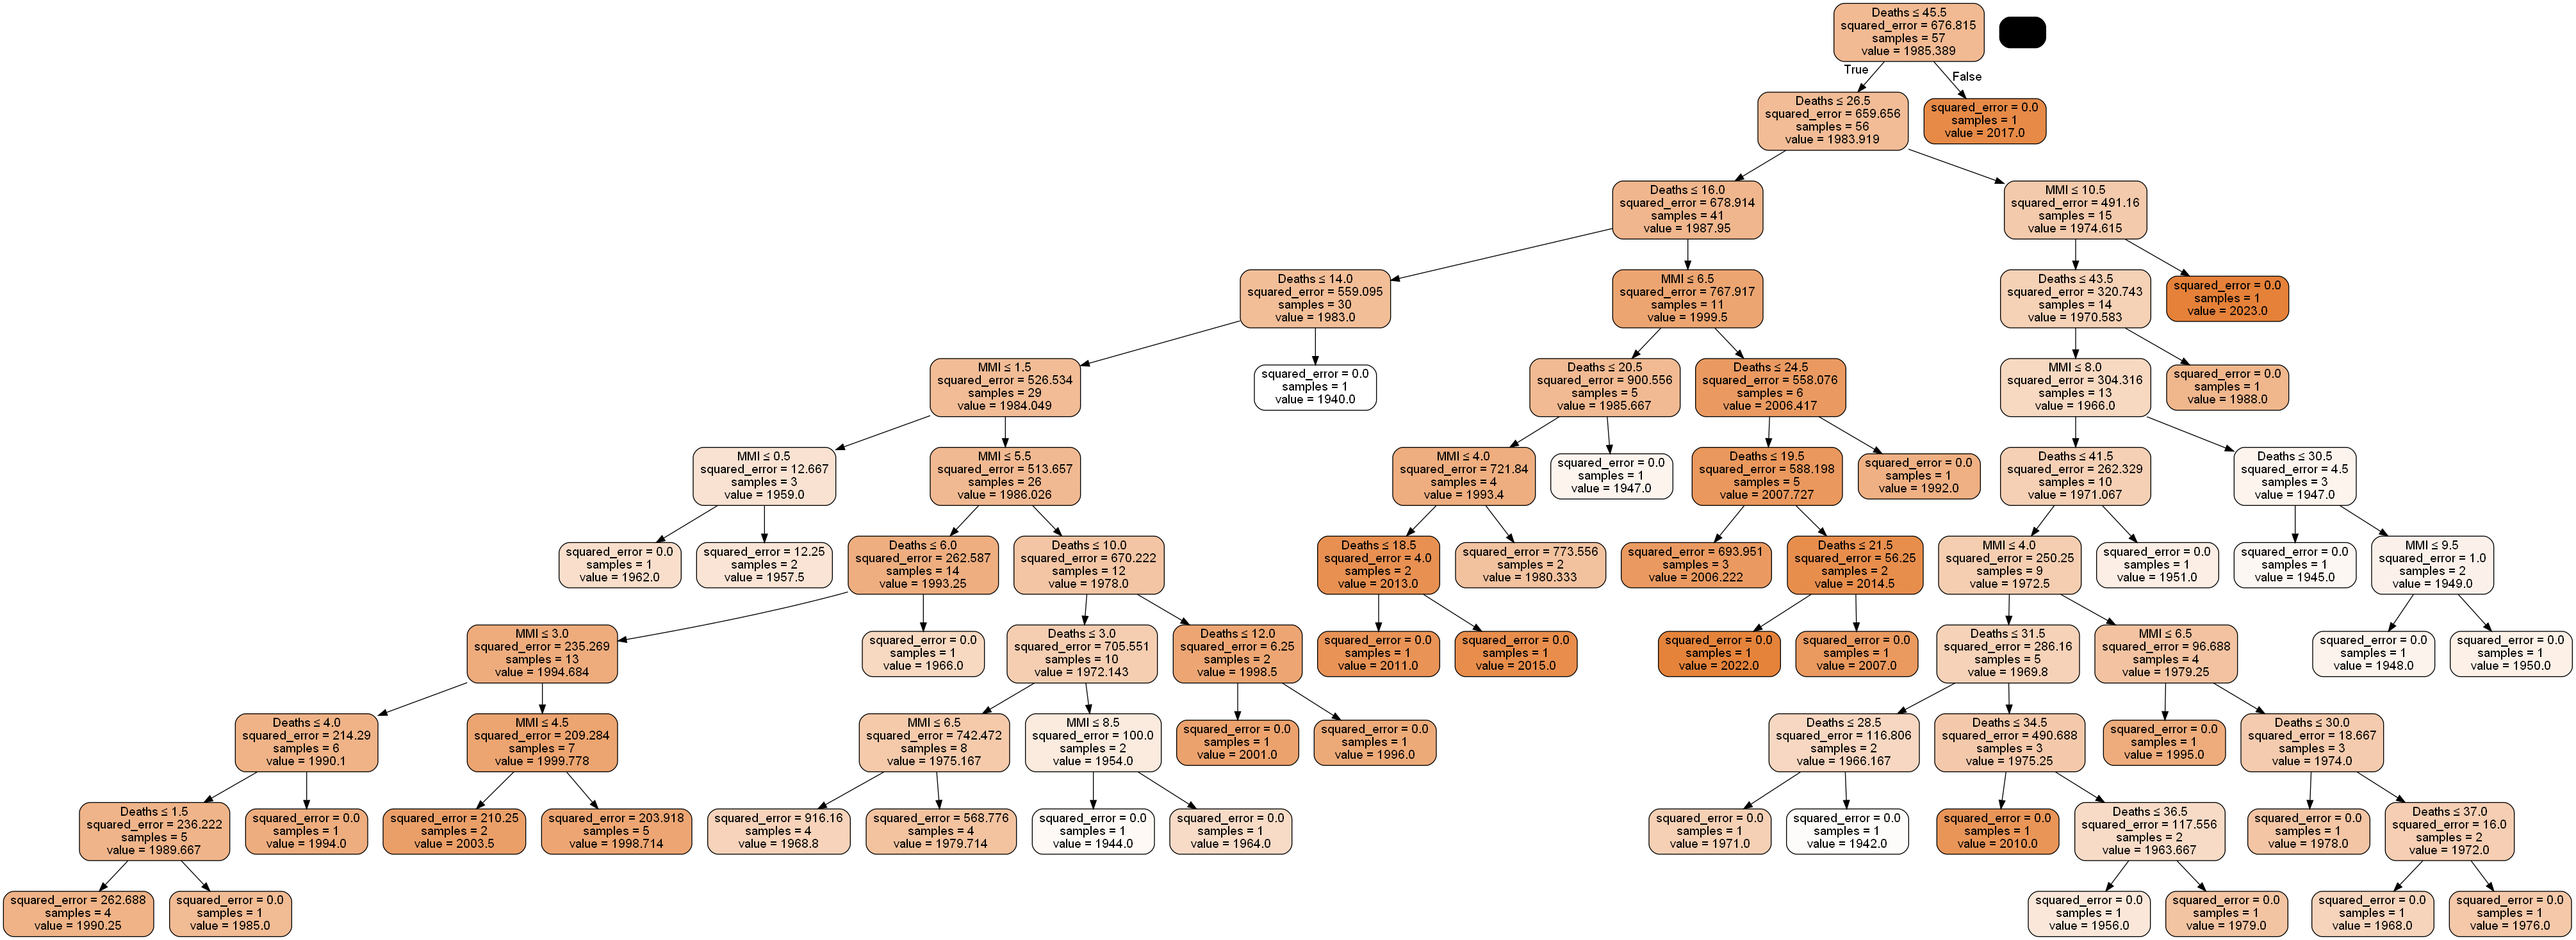

In [29]:
Image(get_png_tree(tree1.estimators_[2], X.columns[:3]), width="100%")

Посмотрим важность признаков в каждом из деревьев

In [30]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

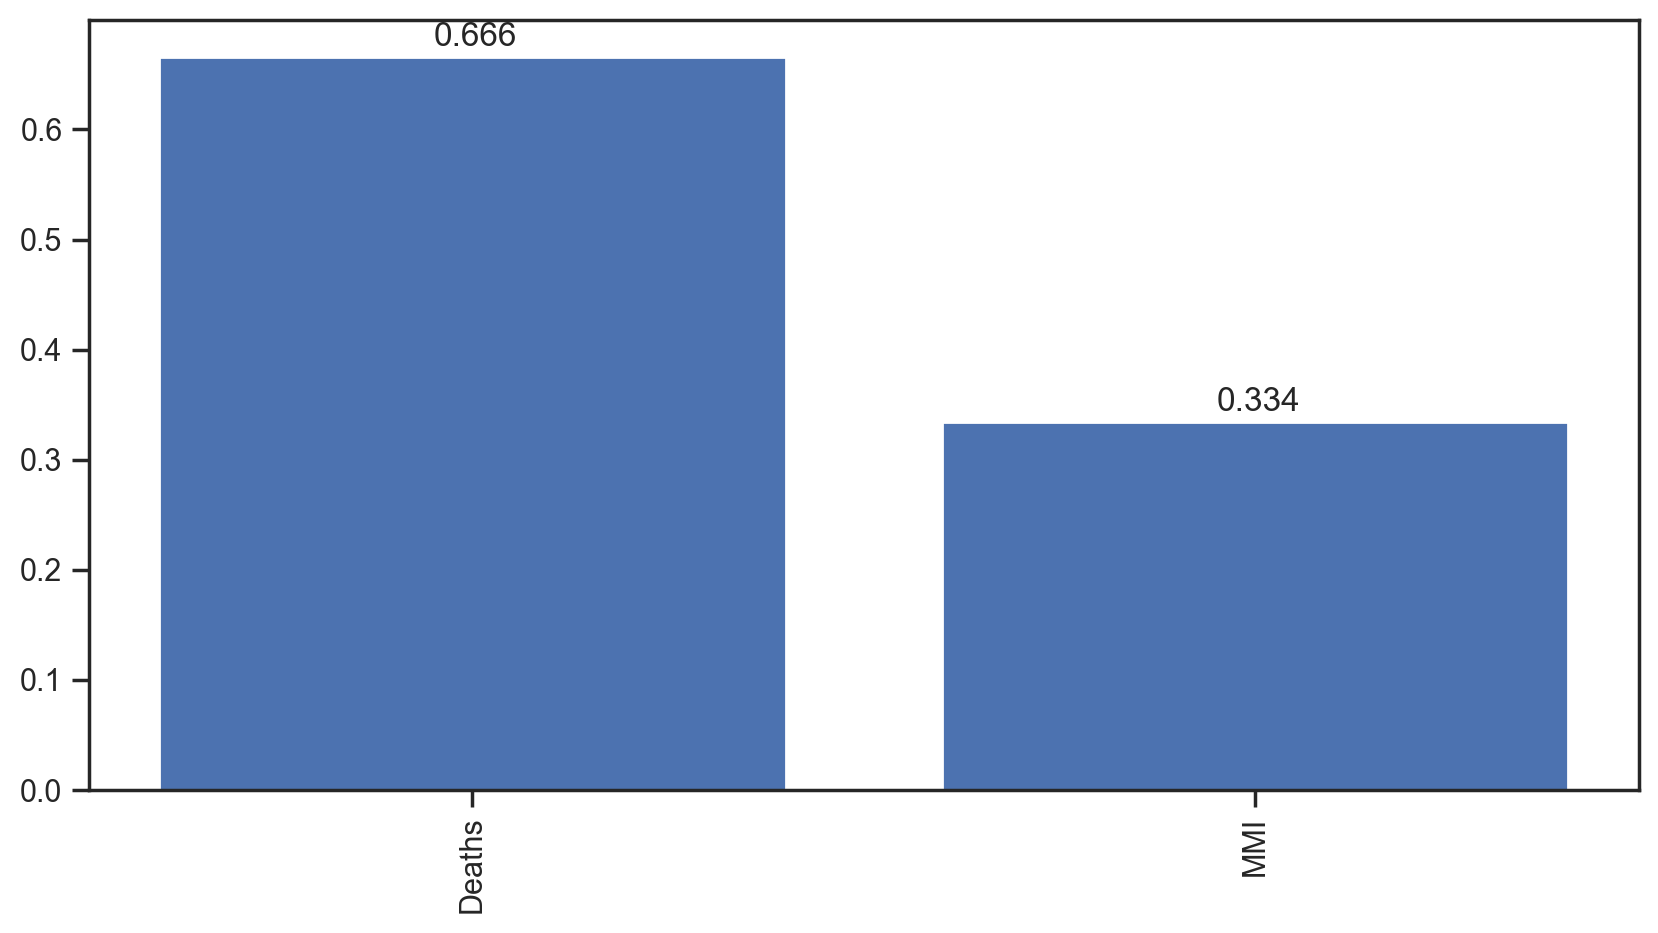

In [31]:
data_rf_reg = RandomForestRegressor(random_state=2022)
data_rf_reg.fit(X, Y)
_,_ = draw_feature_importances(data_rf_reg, X)

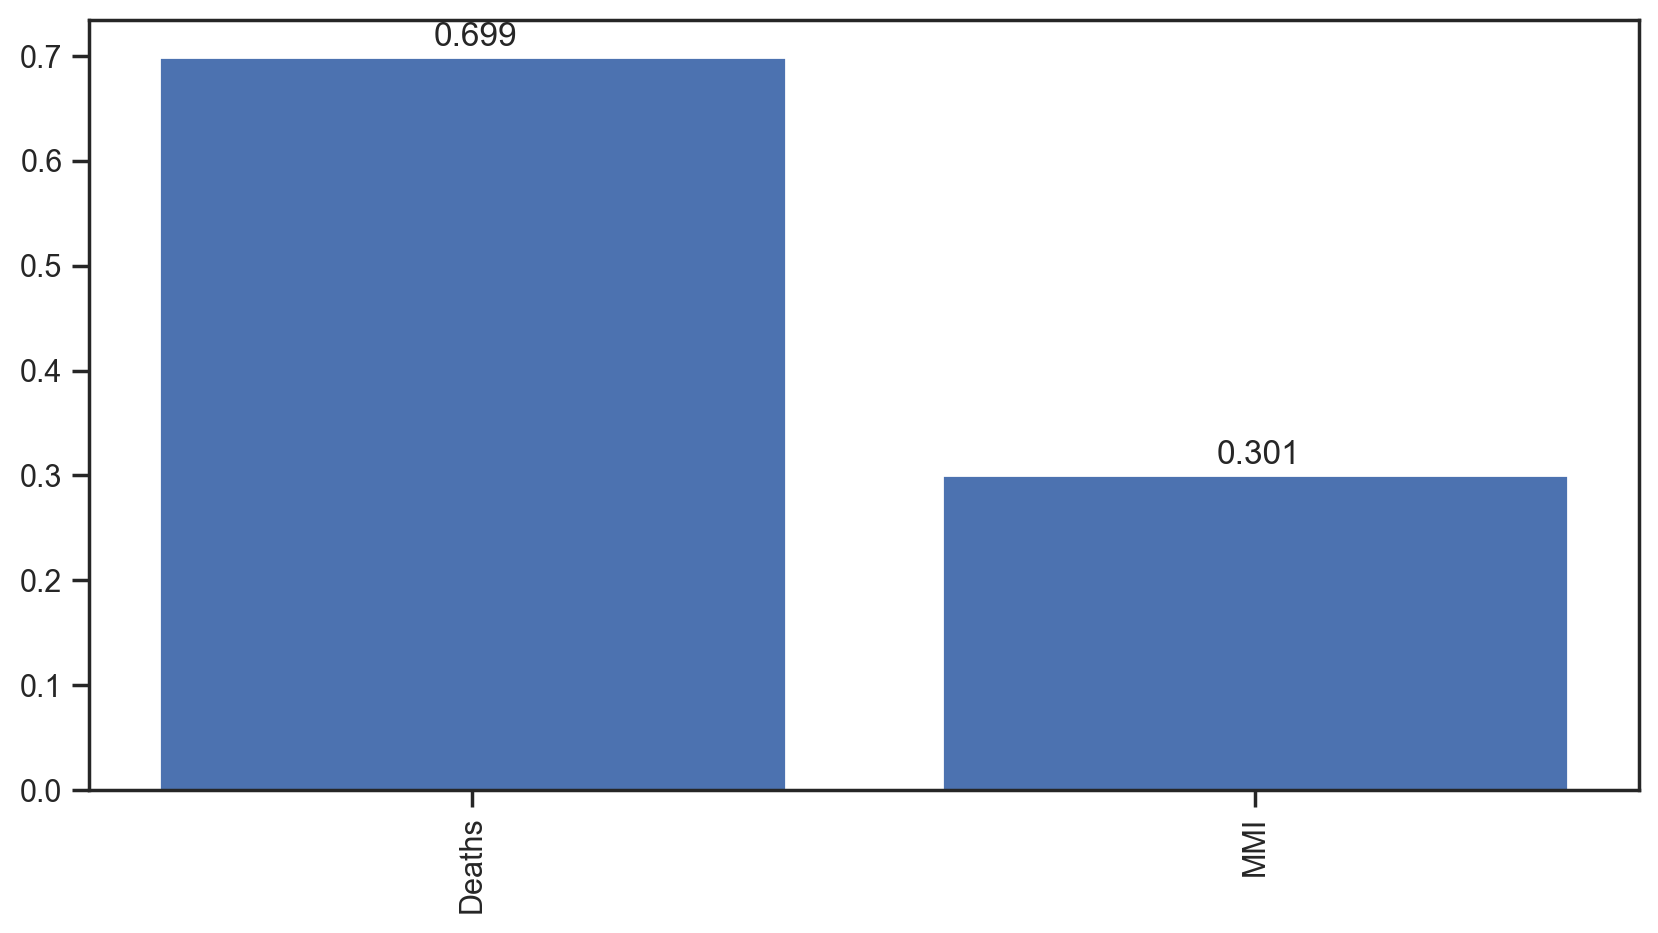

In [32]:
data_xtree_reg = ExtraTreesRegressor(random_state=2022)
data_xtree_reg.fit(X, Y)
_, _ = draw_feature_importances(data_xtree_reg, X)

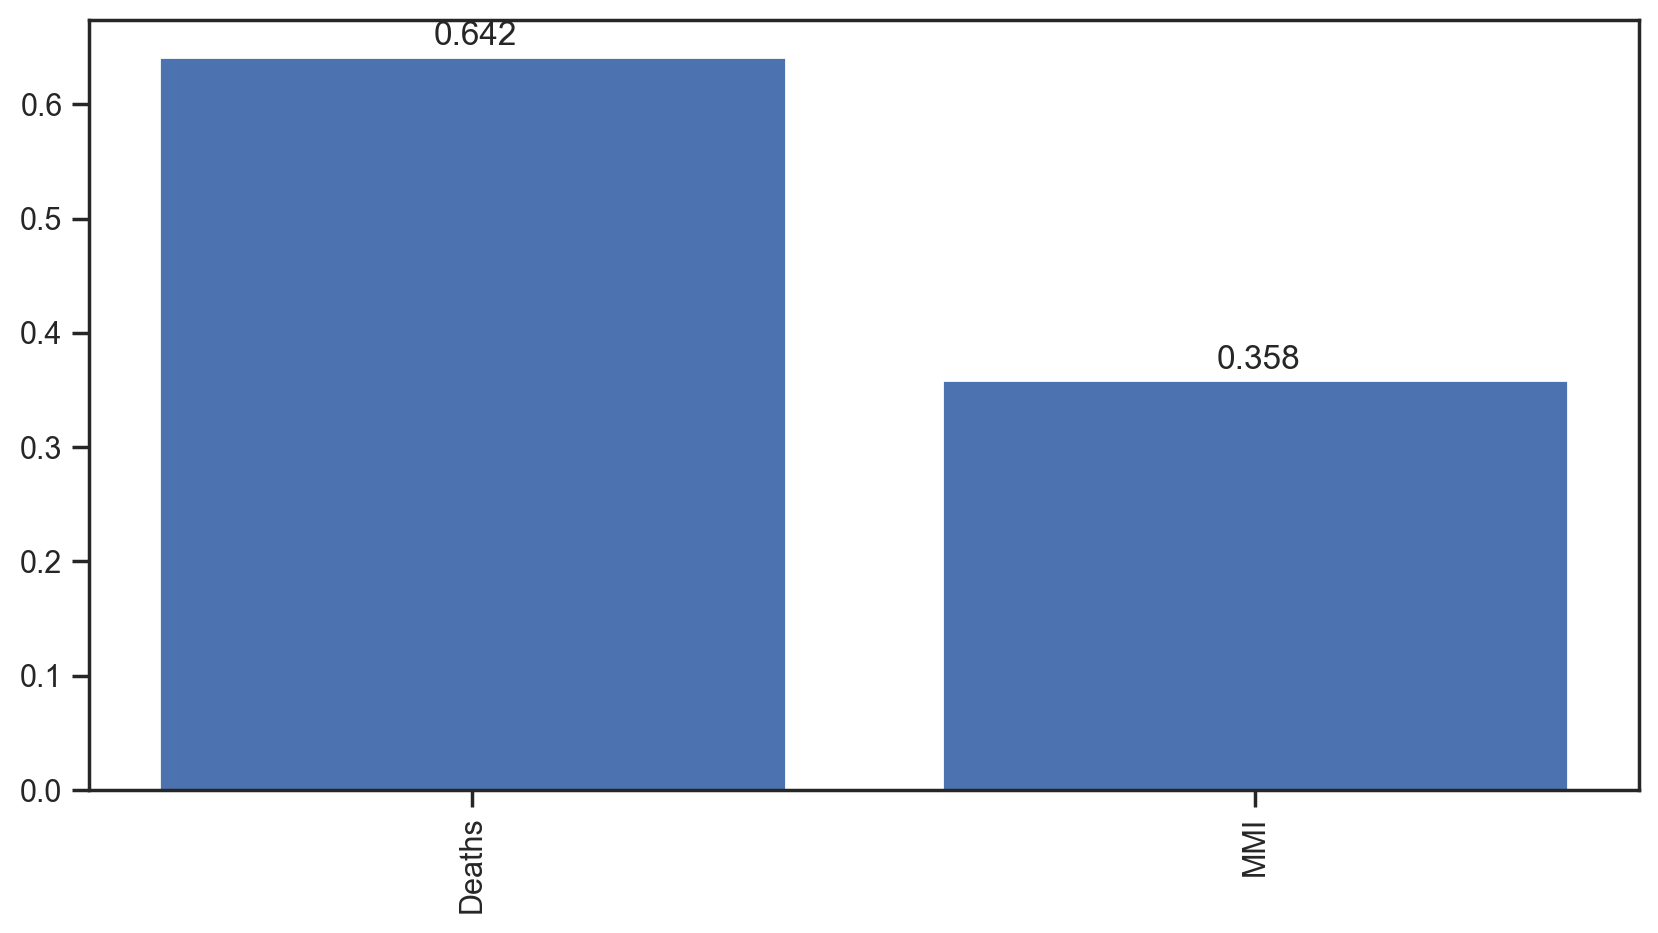

In [33]:
data_tree_reg = DecisionTreeRegressor(random_state=2022)
data_tree_reg.fit(X, Y)
_,_ = draw_feature_importances(data_tree_reg, X)

In [34]:
y_pred1 = tree1.predict(X_test)

In [35]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, y_pred1))

Средняя абсолютная ошибка: 8.23989417989416


### AdaBoost (бустинг)

In [36]:
from sklearn.ensemble import AdaBoostRegressor

Обучим регрессор на 3 деревьях

In [37]:
ab1 = AdaBoostRegressor(n_estimators=3, random_state=2022)
ab1.fit(X, Y)

AdaBoostRegressor(n_estimators=3, random_state=2022)

Выведем используемые деревья

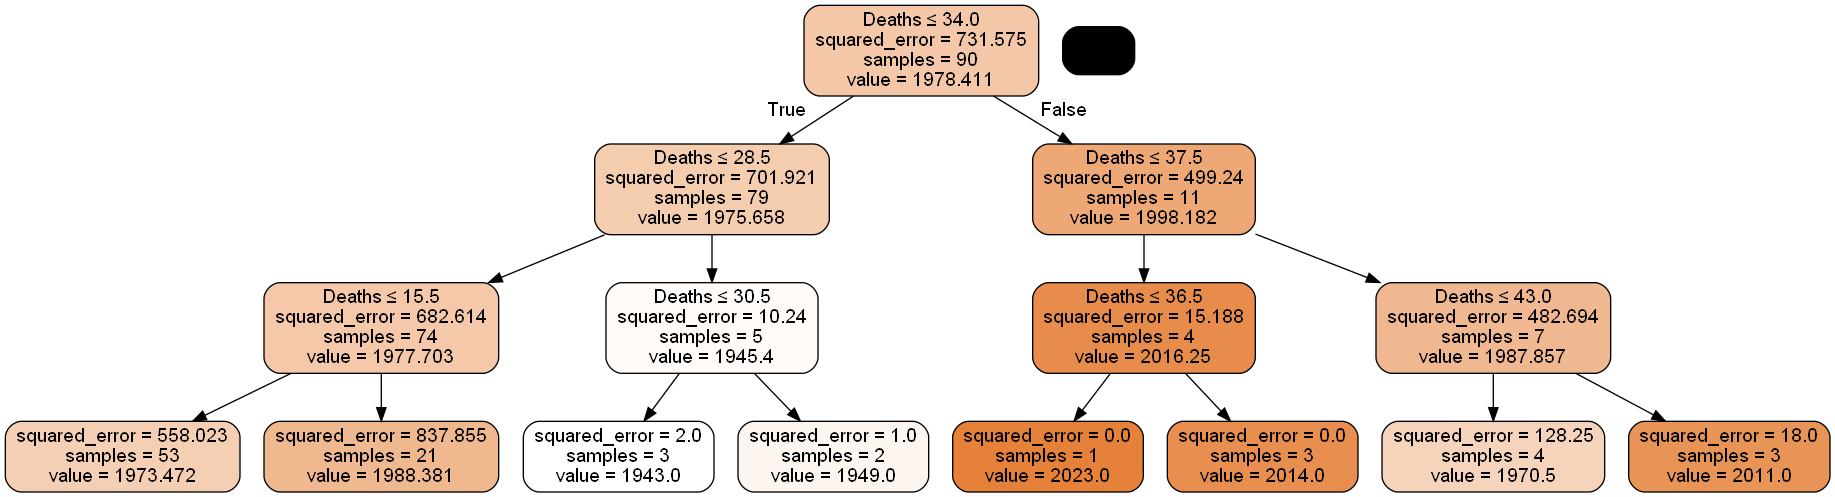

In [38]:
Image(get_png_tree(ab1.estimators_[0], X.columns[:3]), width='40%')

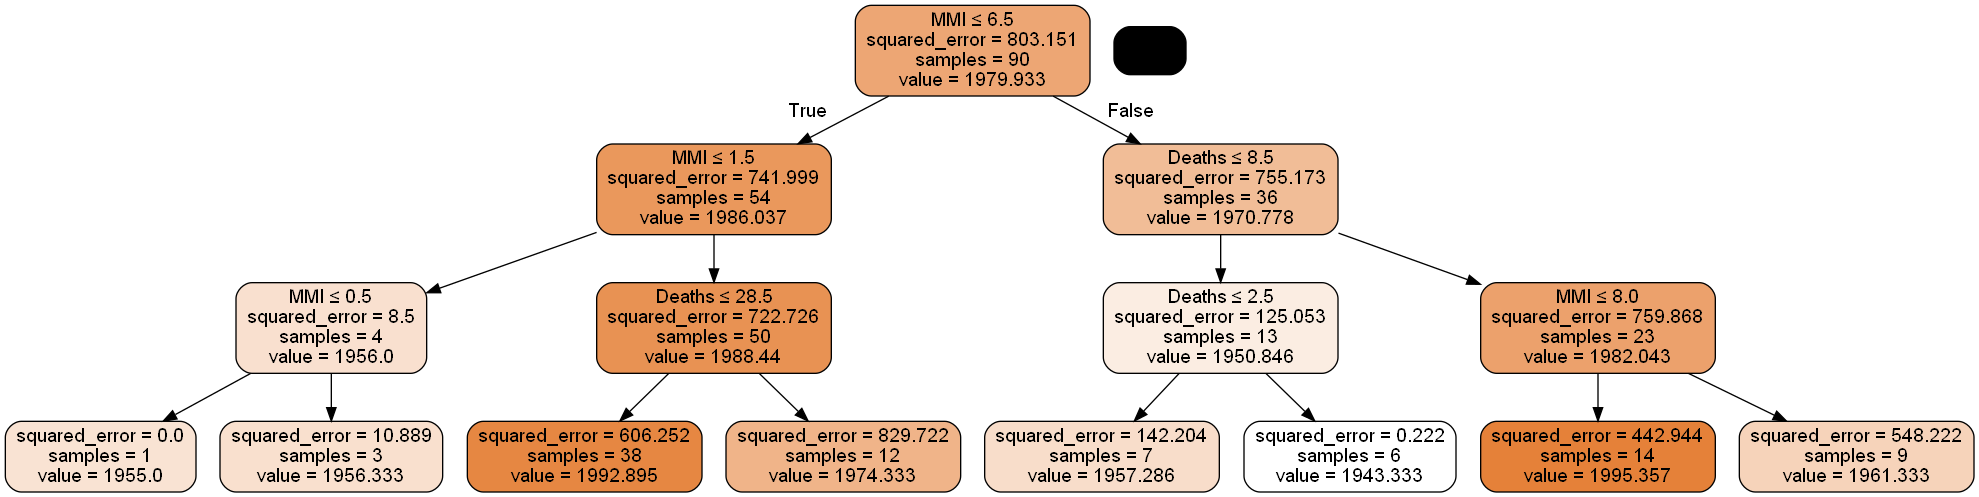

In [39]:
Image(get_png_tree(ab1.estimators_[1], X.columns[:3]), width='40%')

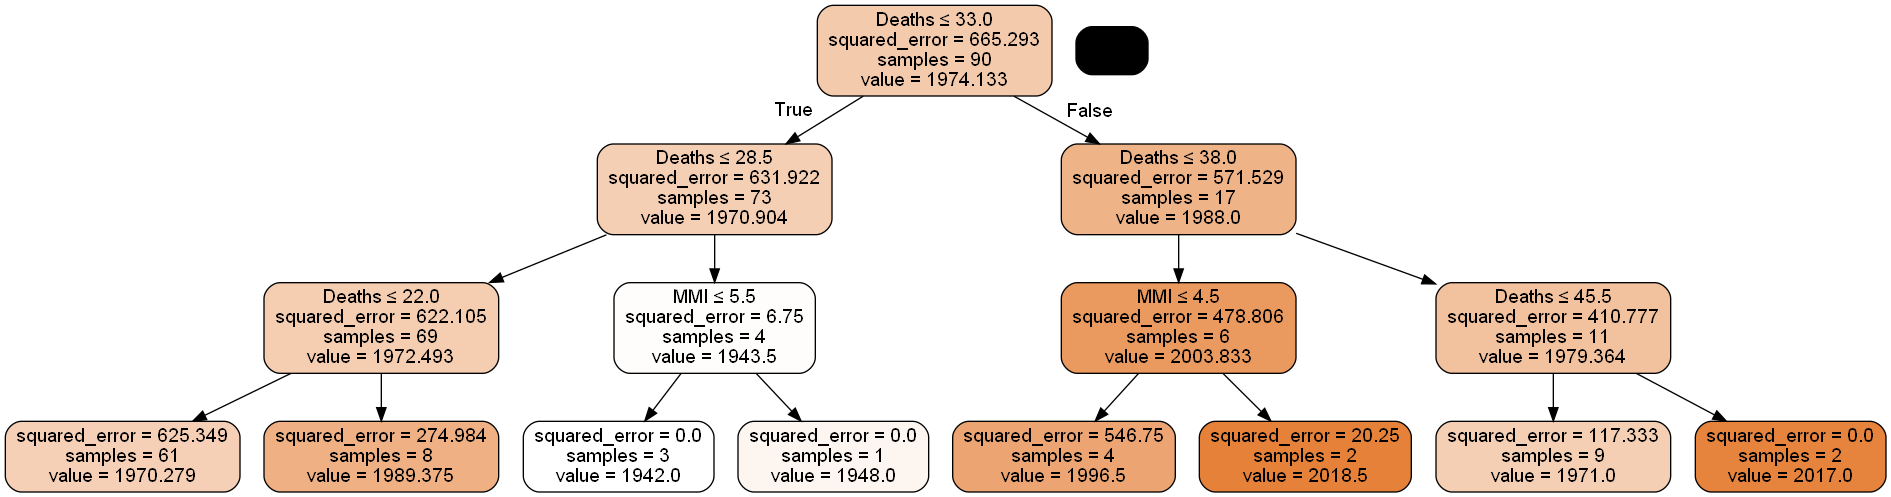

In [40]:
Image(get_png_tree(ab1.estimators_[2], X.columns[:3]), width='40%')

Получим веса деревьев в ансамбле

In [41]:
ab1.estimator_weights_

array([0.89627872, 0.7715381 , 0.21594879])

Проверим важность признаков в модели

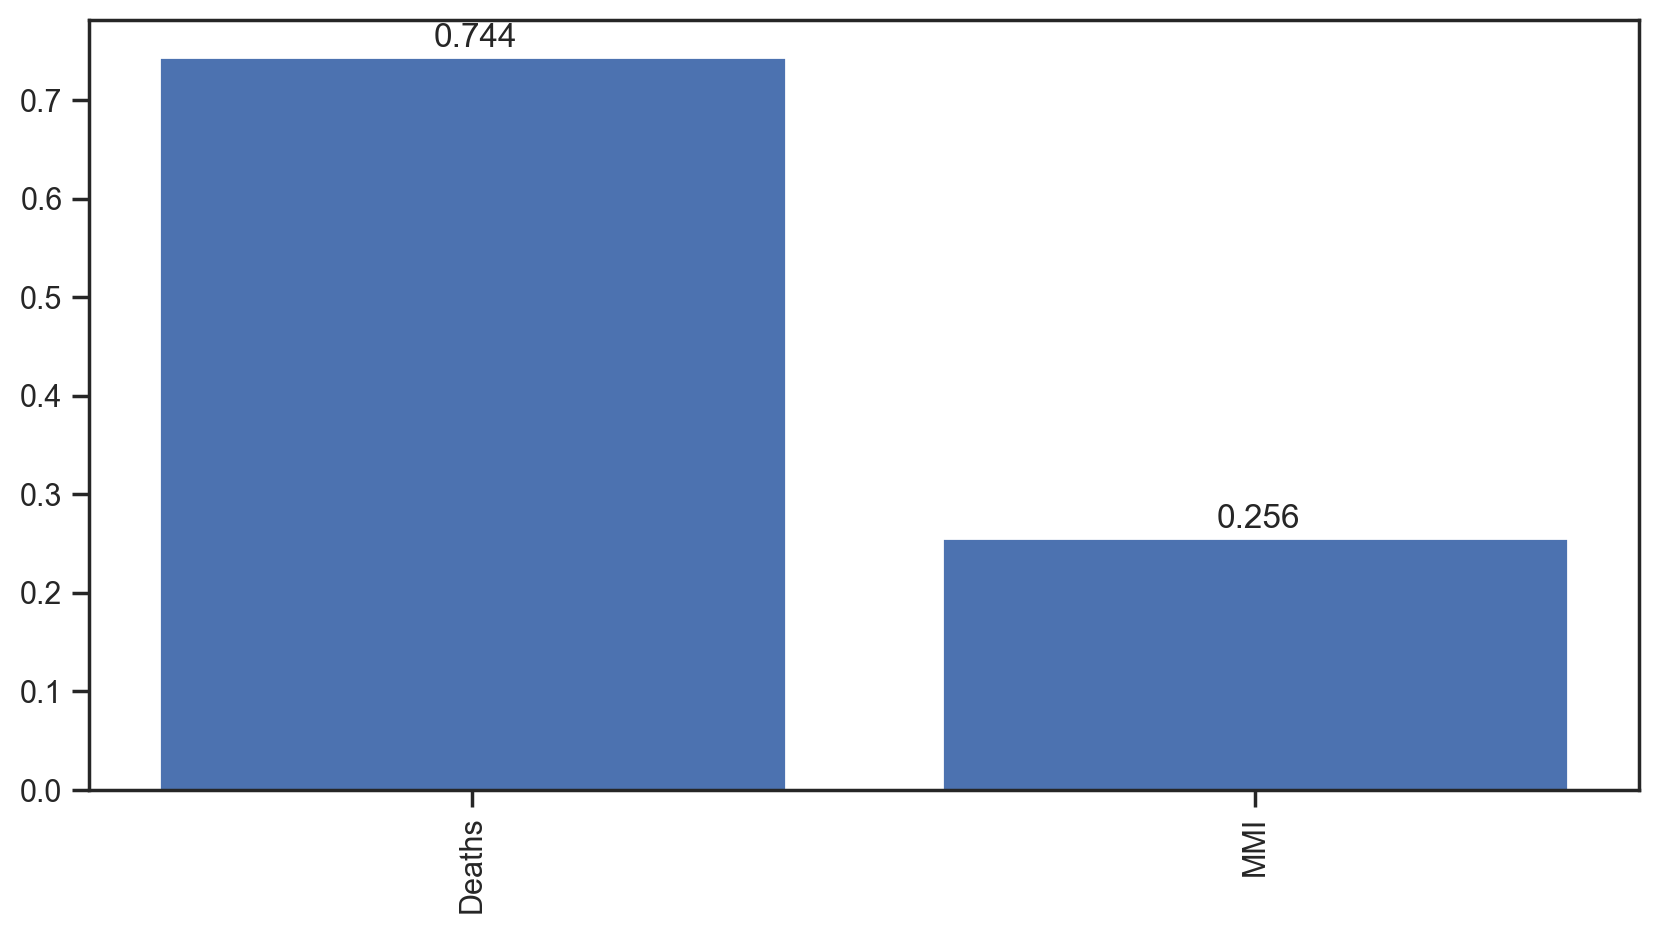

In [42]:
ab2 = AdaBoostRegressor(random_state=2022)
ab2.fit(X, Y)
_,_ = draw_feature_importances(ab2, X)

In [43]:
y_pred2 = ab1.predict(X_test)

In [44]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, y_pred2))

Средняя абсолютная ошибка: 17.9785974499089


### Стекинг

In [45]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [46]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(Y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

Проверим точность на отдельных моделях

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=25.409502044818787

DecisionTreeRegressor()
MAE=17.26388888888889

RandomForestRegressor(n_estimators=50)
MAE=19.906475974642667



In [49]:
dataset = Dataset(X_train, Y_train, X_test)

С использованием библиотеки heamy сделаем стек из трёх уровней

In [50]:
# Первый уровень - две модели: дерево и линейная регрессия
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')